Name 1: Murshed SK

Name 2: Asad Munir

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Mimization

Create a python Function called Func_1(x) $= (x^4-61x^3+1160x^2-7100x+6.e3)*e^{(-\frac{x}{10.})}$

In [2]:
def Func_1(x):
   return (x**4-61*x**3+1160*x**2-7100*x+6000)*np.exp(-x/10)



Define x as an array with lineary spaced values in the range [0,50)

In [3]:
x = np.linspace(0, 50, 1000)  

plot Func_1(x) in the range [0,50]

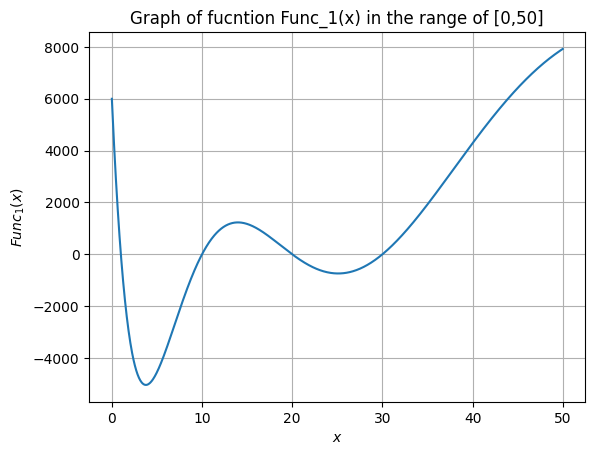

In [4]:
y=Func_1(x)
plt.plot(x,y,label=' Func_1(x) ')
plt.xlabel('$x$')
plt.ylabel( '$Func_1(x)$')
plt.title ('Graph of fucntion Func_1(x) in the range of [0,50]')
plt.grid(True)
plt.show()

Now we will try to find the minimum. Graphically determines the (approximated) miminimum:
HOw many minima ?
ANSWER : 
What are the approximate values ?
________
By observing  the graph we found approximate minima are. 

1 minimum : $x\approx 4$ $y\approx -5000 $

2 minimum : $x\approx 25$ $y\approx -750 $

______

Now we will try to find the minima using the 3 points bissection bracketing rule $[x_1, x_2,x_3]$, so that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$ so that we are sure a minimum exists between $x_1$ and $x_3$.


Write a python function, called " Minim_Func_1 ", that finds the minimum of function Func_1(x), starting from a triplet (x1,x2,x3) defined as above.

Your code must:

* take x1,x2,X3 as an arguement as well as:  $\epsilon$, the desired accuracy
* check first that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$
* iterate to find the minimum 
* Make sure than no more than Nitermax(=1000) iterations are done.

The function must return three number :

The value of the found minimum, the accuracy, the number of steps.







1st method : The new point to consider will be the center  of the largest segment.


In [5]:
# Minimization Function using 3-point Bisection Method
def Minim_Func_1(x1, x2, x3, eps, Nitermax=1000):
    """
    Parameters:
    x1, x2, x3 (float): Initial points for the triplet [x1, x2, x3].
    epsilon (float): Desired accuracy.
    Nitermax (int): Maximum number of iterations (default is 1000).
    
    Returns:
    tuple: (minimum value, accuracy, number of iterations)
    """
    # Evaluate the function at the initial points
    F1 = Func_1(x1)
    F2 = Func_1(x2)
    F3 = Func_1(x3)
    
    # Ensure that f(x2) is the minimum at the start
    if not (F2 < F1 and F2 < F3):
        raise ValueError("Initial points must satisfy $F(x2)$ < $F(x1)$ and $F(x2)$ < $F(x3)$")
    
    count = 0
    while abs(x3 - x1) > eps and count < Nitermax:
        # Identify the largest segment
        if (x2 - x1) > (x3 - x2):
            # Take the center of the [x1, x2] segment
            X = 0.5 * (x1 + x2)
            if Func_1(X) < F2:
                x3 = x2
                x2 = X
            else:
                x1 = x2
                x2 = X
        else:
            # Take the center of the [x2, x3] segment
            X = 0.5 * (x2 + x3)
            if Func_1(X) < F2:
                x1 = x2
                x2 = X
            else:
                x3 = x2
                x2 = X
        
        # Update function values
        F1 = Func_1(x1)
        F2 = Func_1(x2)
        F3 = Func_1(x3)
        
        # Increment iteration count
        count += 1
    
    # Return the found minimum, accuracy, and iteration count
    return x2, abs(x3 - x1), count



In [6]:
Minim_Func_1(0,5,10, 1e-6)

(3.6035152478143573, 7.543712854385376e-07, 30)

Plot the number of iterations needed to get an accuracy , abs(x3-x1) , of 0.01, 0.001, 1.e-3,1.e-4, 1.e-5,1.e-6)



<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\e'
C:\Users\HP\AppData\Local\Temp\ipykernel_7812\437563426.py:21: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Accuracy ($ \epsilon  $)')


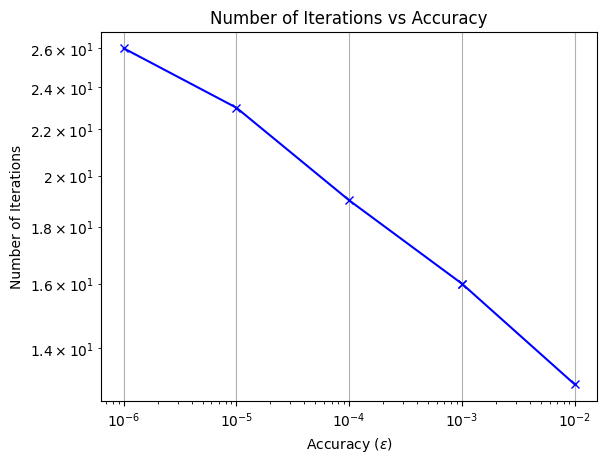

In [7]:
# DeFunc_1ine the initial points x1, x2, x3
x1 = 2
x2 = 4
x3 = 8

# DeFunc_1ine the target accuracies
accuracies = [0.01, 0.001, 1e-3, 1e-4, 1e-5, 1e-6]

# List to store the number oFunc_1 iterations Func_1or each accuracy
iterations_needed = []

# Iterate over each accuracy and calculate the number of Func_1 iterations
for eps in accuracies:
    minimum_value, accuracy, iterations = Minim_Func_1(x1, x2, x3, eps)
    iterations_needed.append(iterations)

# Plot the number oFunc_1 iterations vs accuracy
plt.plot(accuracies, iterations_needed, marker='x', linestyle='-', color='b')

# Set plot labels and title
plt.xlabel('Accuracy ($ \epsilon  $)')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Accuracy',)
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

Plot the number and accuracy of the solution  as a function of the number of iterations. You can use the python matplotlib funcion : plt.semilogy

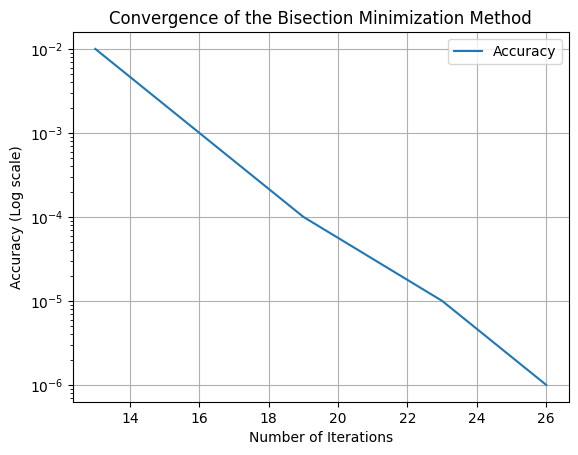

x value:3.4999996423721313
Func_1inal Accuracy: 7.152557373046875e-07
Number oFunc_1 Iterations: 26


In [8]:
plt.semilogy(iterations_needed, accuracies, label="Accuracy")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy (Log scale)")
plt.title("Convergence of the Bisection Minimization Method")
plt.grid(True)
plt.legend()
plt.show()

# Print results
print(f"x value:{minimum_value}")
print(f"Func_1inal Accuracy: {accuracy}")
print(f"Number oFunc_1 Iterations: {iterations}")



## A superlinear method.

We use [x1,x2,x3] as usual to bracket the minimum, but now point x4 will be the chose as the minimum of the parabola that passes through the 3 points [x1,x2,x3] with values [f(x1),f(x2),fx(3)] 
Note :The  the minimum of the parabola that passes trhough the 3 points f(a),f(b),fx(c) is located at abscissa X such that =

$
X=b-0.5\frac{(b-a)^2(f(b)-f(c))-(b-c)^2(f(b)-f(a))}{(b-a)(f(b)-f(c))-(b-c)(f(b)-f(a))}
$

Build a minimisation function called : Minim_Parab_Func_1 that search for the minimum using parabolic descent.

Note 1: for the method to be more efficient than bissection you must make sure at each time step that the new interval has a width smaller than 0.5 of the previoux step.
So a good way to do that is to compute X4 using the formula above (X=) that is the best guess for the next minimum and take the smallest segment that brackets the minimum wihin points [x1,x2,x3,x4,0.5*(x1+x3)].



For this we can use the two following methods :
* np.sort(S), that sort in ascending order a list of values contained in a list S
* V.argmin() that returns the index of the smallest element in a array (numpy array) V.
* to transform a list in a numpy array you can use : np.array(L) where L is a list.
Example : L=[1,2,3] is a list and np.array(L) returns an array with the same elements as in L

Note 2: Make sure that your interval is ALWAYS equilibrated, I mean that x2-x1 is always comparable to x3-x2 (not necessarily equal), to avoid the *bad* situation where one of the interval is much smaller than the other one.

Note 3 : To check that your minimization process is performing well,  I suggest that at each step you print x1,x2,x3 to check that everything is occuring properly.


In [9]:
def Minim_Parab_Func_1(x1,x2,x3, epsilon, Nitermax=1000):
    
# Defining the function values at endpoints x1 and x3 and at middle point x2:
    F1=Func_1(x1)
    F2=Func_1(x2)
    F3=Func_1(x3)

    if not (F1>F2<F3) :
        raise ValueError

    counter=0
    while counter<Nitermax:
        
    #Using parabolic iterpolation formula
      numerator=(x2-x1)**2*(F2-F3)-(x2-x3)**2*(F2-F1) #defining the numerator of interpolation formula
      denominator=(x2-x1)*(F2-F3)-(x2-x3)*(F2-F1) #the denominator of the parabolic interpolation

      if denominator==0: #avoids devision on  0
          break


      x4=x2-0.5*numerator/denominator # finding the minimum point of the parabola we fitted between points x1,x2,x3
      F4=Func_1(x4) # min parabola function value at point x4

      X = 0.5 * (x1 + x3) # this is the arithmetic mean of the interval [x1,x3]
      F_mid = Func_1(X) # returns the value of the function Func_1(x) at X


      x_values=np.array([x1,x2,x3,x4,X])
      f_values=np.array([F1,F2,F3,F4,F_mid])
        
    # Sorting the x values in ascending order

      sorted_indices=np.argsort(x_values) #sorting our indexes by ascending order of value x
      x_values=x_values[sorted_indices] # you get an array of indices that indicate the correct order of points 
      f_values=f_values[sorted_indices] # this ensures that the f values in the array are in the right order,

    # Find the index of the minimum value
      min_index = np.argmin(f_values)

    # Update [x1, x2, x3] to the smallest segment bracketing the minimum

      if min_index==0:
           x1,x2,x3 = x_values[0],x_values[1],x_values[2] #if the minimum value f corresponding to the position of x with zero index 
                                                       
      elif min_index==len(x_values)-1:                 # if the minimum value corresponds to the righmost element of x_values array
           x1,x2,x3=x_values[-3],x_values[-2],x_values[-1] # to increment the minimum we take as our new segment the last point [-1], 

      else:

          x1,x2,x3=x_values[min_index-1],x_values[min_index],x_values[min_index+1]

        # Updating the function values

          F1,F2,F3 = Func_1(x1),Func_1(x2),Func_1(x3)

        # Checking the convergence

      if abs(x3-x1)<epsilon :
             break

      counter+=1

    # Returning the values

    min_value=Func_1(x2)
    return x2,abs(x3-x1),counter

In [10]:
# First minimum search (left interval)
x1, x2, x3 = 2, 4, 8
x_min_1, accuracy, steps_1 = Minim_Parab_Func_1(x1,x2,x3, epsilon = 1e-6)
print(f"1st Minimum: x = {x_min_1:.6f}, Steps = {steps_1}")

1st Minimum: x = 3.774708, Steps = 9


Test the convergence speed of the parabolic descent rule, and display  a same graph as before. Show that the parabolic method converges much more rapidly than other method

In [11]:
Minim_Parab_Func_1(2, 4, 8, 1e-1)


(3.7763426545091057, 0.022852562291138856, 3)

PLot the accuracy of the result, as a function of the number of iterations for the bissection and for the superlinear method.

In [12]:
x,eps,Np0=Minim_Parab_Func_1(2, 4, 8, 1e-1)
x,eps,Np1=Minim_Parab_Func_1(2, 4, 8, 1e-2)
x,eps,Np2=Minim_Parab_Func_1(2, 4, 8, 1e-3)
x,eps,Np3=Minim_Parab_Func_1(2, 4, 8, 1e-4)
x,eps,Np4=Minim_Parab_Func_1(2, 4, 8, 1e-5)
x,eps,Np5=Minim_Parab_Func_1(2, 4, 8, 1e-6)
Nplist=[Np0,Np1,Np2,Np3,Np4,Np5]



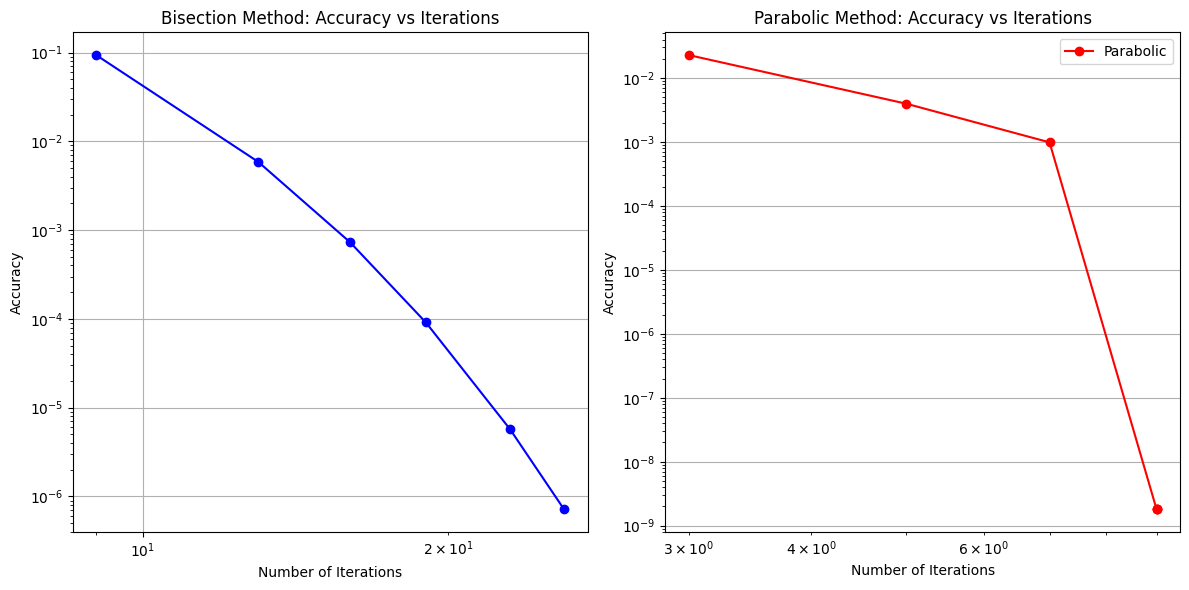

In [13]:
# Define the range of eps values
epsilon_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

# Initialize lists to store results
bisec_iterations = []
bisec_accuracies = []
parab_iterations = []
parab_accuracies = []

# Run both methods for each eps
for epsilon in epsilon_values:
    # Bisection method
    x_bisec, acc_bisec, n_bisec = Minim_Func_1(2, 4, 8,epsilon)
    bisec_iterations.append(n_bisec)
    bisec_accuracies.append(acc_bisec)

    # Parabolic method
    x_parab, acc_parab, n_parab = Minim_Parab_Func_1(2, 4, 8, epsilon)
    parab_iterations.append(n_parab)
    parab_accuracies.append(acc_parab)

# Plot the results

plt.figure(figsize=(12, 6))

# Plot for Bisection method
plt.subplot(1, 2, 1)
plt.plot(bisec_iterations, bisec_accuracies, 'o-', label='Bisection', color='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Bisection Method: Accuracy vs Iterations')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

# Plot for Parabolic method
plt.subplot(1, 2, 2)
plt.plot(parab_iterations, parab_accuracies, 'o-', label='Parabolic', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Parabolic Method: Accuracy vs Iterations')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.legend()
plt.show()


_____
**Explanation:**
We can see that the parabolic descent approximation method converges very fast. On the graph represented, the convergence speed for finding the same minimum of the function (1st minimum) for 2 starting guess intervals : red graph - $[2,4,8]$ ; blue graph -$[0,5,10]$.
One can see that if we take the starting interval as $[0,5,10]$, the method converges within one step, means the interval encloses the minimum parabolic value, which is very close to the real minimum value of the given function. Test Interval $[2,4,8]$ is a bit far from actual minimum point, so it takes 9 iterations to find the minimum of the function F(x), with the precision $\epsilon=10^{-6}$.
As a result we see a constant function N_iter(eps) for the interval $[0,5,10]$, because it accurately converged to minimum within one step and number of steps does't depend on the given accuracies.

If we compare it with previous bisection method of searching the minimum, one can see from the graphs, that the parabolic method has much faster convergence : 9 iterations against 39 iterations for bisection method; for the same accuracy $\epsilon=10^{-6}$.

_______

_____
**Conslusions:**

If we compare it with previous bisection method of searching the minimum, one can see from the graphs, that the parabolic method has much faster convergence. For example for the same accuracy $\epsilon=10^{-6}$ parabolic approx method needs only 9 iterations against 39 iterations, needed for bisection method. This tells that the parabolic descent method is more effitient and quick.

_______

# finding the minimum of an arbitrary function : passing a function name as an argument


Now we wish our previous minimization function to be able to minimize any function, and not only the function called "Func_1". So we need to pass the function name as an argument. This is very simple in Python: we can just use an argument called (for example) $func$ and when we call the minimization function,  just pass the name of this funcion (without ' or ") in the variable func.
* Define a python function called Func_2(x) that compute any function of x (for example $f(x)=x^6-x^3$, or anything else you wish)
* Define a python function called 'call_func(f)', that will return f(2) by calling : call_func(Func_2) 

Shows that it works by typing : call_func(Func_2) 

In [14]:
def Func_2(x):
    return x**6 - x**3

def call_func(f):
    return f(2)

result = call_func(Func_2)
print("f(2) = ", result)

f(2) =  56


Finding a minimum :
    plot Func_2 within a range of values of your choice bracketing is a minimum (between 0 and 1 should be enough)

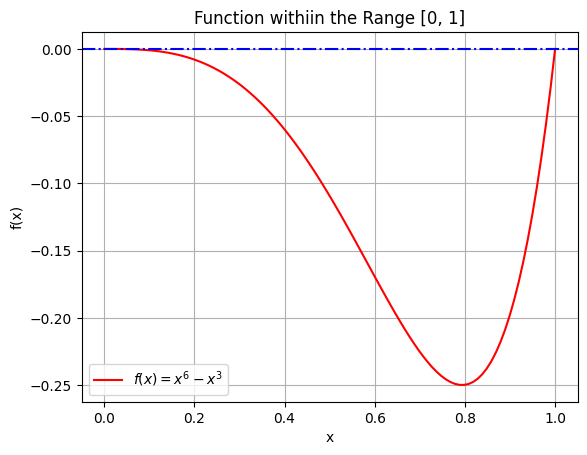

In [15]:
x = np.linspace(0, 1,100)
y = Func_2(x)

plt.plot(x, y, label=r"$f(x) = x^6 - x^3$", color="red")
plt.title("Function withiin the Range [0, 1]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color="blue", linestyle="-.")  # Horizontal line at y=0
plt.grid()
plt.legend()
plt.show()

Build a minimization function of your choice that will accept [x1,x2,x3,Func_2] as an argument and that will find the minimum of Func_2 within [x1,x3]. Try to reuse what you have already coded above

In [16]:
def Minim_Parab_Func_2(x1, x2, x3, func, epsilon=1e-6, Nitermax=1000):
    F1, F2, F3 = func(x1), func(x2), func(x3)
    if not (F1 > F2 < F3):
        raise ValueError("Initial triplet must satisfy F(x2) < F(x1) and F(x2) < F(x3).")

    counts = 0

    while abs(x3 - x1) > epsilon and counts < Nitermax:
        # Parabolic interpolation formula
        numerator = (x2 - x1)**2 * (F2 - F3) - (x2 - x3)**2 * (F2 - F1)
        denominator = (x2 - x1) * (F2 - F3) - (x2 - x3) * (F2 - F1)

        if denominator == 0: 
            break

        x4 = x2 - 0.5 * numerator / denominator
        F4 = func(x4)

        X = 0.5 * (x1 + x3)
        F_mid = func(X)

        x_values = np.array([x1, x2, x3, x4, X])
        f_values = np.array([F1, F2, F3, F4, F_mid])

        sorted_indices = np.argsort(x_values)
        x_values = x_values[sorted_indices]
        f_values = f_values[sorted_indices]

        min_index = np.argmin(f_values)

        if min_index == 0:
            x1, x2, x3 = x_values[0], x_values[1], x_values[2]
        elif min_index == len(x_values) - 1:
            x1, x2, x3 = x_values[-3], x_values[-2], x_values[-1]
        else:
            x1, x2, x3 = x_values[min_index - 1], x_values[min_index], x_values[min_index + 1]

        F1, F2, F3 = func(x1), func(x2), func(x3)

        counts += 1

    return func(x2), x2, counts

def Func_2(x):
    return x**6 - x**3

x1, x2, x3 = 0.5, 0.7, 1  
min_value, x_min, steps = Minim_Parab_Func_2(x1, x2, x3, Func_2, epsilon = 1e-6)
print(f"Minimum: f(x) = {min_value:.6f} at x = {x_min:.6f}, found in {steps} steps.")

Minimum: f(x) = -0.250000 at x = 0.793701, found in 9 steps.


# Fitting a model to data: Determining the elimination time of a medicine in the body


We try to determine how long it takes for a medecine to be eliminated from a human body (metabolisation or eliminationin urines). The medicine is injected in a subject, and measurements of the medicine concentration are done regularly during several days. The data are the following. t is the date of all measurements (in minutes, t=0 is the moment of the injection).


In [17]:
t=[0, 1.27202491e+02, 3.14663948e+02, 4.47499292e+02,
       5.77904807e+02, 7.36644162e+02, 8.77944621e+02, 1.03429168e+03,
       1.18319505e+03, 1.33041427e+03, 1.48234442e+03, 1.64547130e+03,
       1.77172013e+03, 1.92313885e+03, 2.07086937e+03, 2.22777241e+03,
       2.37867541e+03, 2.50116573e+03, 2.65833952e+03, 2.82126398e+03,
       2.95786912e+03, 3.10040140e+03, 3.25340147e+03, 3.41529223e+03,
       3.53234880e+03, 3.68589222e+03, 3.85383279e+03, 3.99062701e+03,
       4.11829287e+03, 4.26010451e+03, 4.42751803e+03, 4.57595613e+03,
       4.73240964e+03, 4.87564297e+03, 5.02498239e+03, 5.16407107e+03,
       5.31320580e+03, 5.45634412e+03, 5.61789192e+03, 5.75401807e+03]


The corresponding measured concentration are the following (in arbirary units)

In [18]:
C=[100.,  84.19752483,  79.43669653,  77.49545165,
        64.54338469,  45.67223012,  34.75582205,  36.55283011,
        41.88282264,  28.1426116 ,  21.06445026,  19.8784981 ,
        14.20655088,  13.00527066,  15.21292955,   9.48415543,
         7.86202904,   9.48789641,  12.26344071,   6.86855964,
        14.8847701 ,   0.        ,   9.94703693,   4.97773134,
         8.15232925,   4.48353225,   8.75568603,   1.12007805,
         8.0847839 ,   0.        ,   1.19374786,   0.        ,
        11.38141968,   0.        ,   5.42182953,   0.        ,
         1.69707766,  15.76470042,   3.25146039,   1.46703363]

Plot C(t) with xlabel "minutes" and ylabel "concentration"

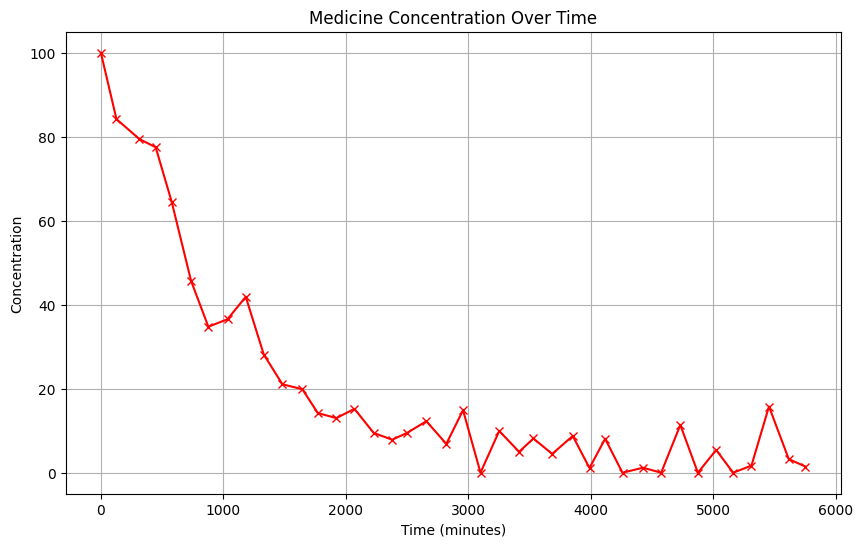

In [19]:
t = np.array([0, 1.27202491e+02, 3.14663948e+02, 4.47499292e+02,
              5.77904807e+02, 7.36644162e+02, 8.77944621e+02, 1.03429168e+03,
              1.18319505e+03, 1.33041427e+03, 1.48234442e+03, 1.64547130e+03,
              1.77172013e+03, 1.92313885e+03, 2.07086937e+03, 2.22777241e+03,
              2.37867541e+03, 2.50116573e+03, 2.65833952e+03, 2.82126398e+03,
              2.95786912e+03, 3.10040140e+03, 3.25340147e+03, 3.41529223e+03,
              3.53234880e+03, 3.68589222e+03, 3.85383279e+03, 3.99062701e+03,
              4.11829287e+03, 4.26010451e+03, 4.42751803e+03, 4.57595613e+03,
              4.73240964e+03, 4.87564297e+03, 5.02498239e+03, 5.16407107e+03,
              5.31320580e+03, 5.45634412e+03, 5.61789192e+03, 5.75401807e+03])

C = np.array([100.,  84.19752483,  79.43669653,  77.49545165,
              64.54338469,  45.67223012,  34.75582205,  36.55283011,
              41.88282264,  28.1426116 ,  21.06445026,  19.8784981 ,
              14.20655088,  13.00527066,  15.21292955,   9.48415543,
               7.86202904,   9.48789641,  12.26344071,   6.86855964,
              14.8847701 ,   0.        ,   9.94703693,   4.97773134,
               8.15232925,   4.48353225,   8.75568603,   1.12007805,
               8.0847839 ,   0.        ,   1.19374786,   0.        ,
              11.38141968,   0.        ,   5.42182953,   0.        ,
               1.69707766,  15.76470042,   3.25146039,   1.46703363])

plt.figure(figsize=(10, 6))
plt.plot(t, C, marker='x', linestyle='-', color='r')
plt.xlabel('Time (minutes)')
plt.ylabel('Concentration')
plt.title('Medicine Concentration Over Time')
plt.grid()
plt.show()

We assume now that C(t) can be given the form $C(t,\lambda)=100e^{-t/\lambda}$. We try to determine the value of $\lambda$ that best fits the function. In order to do this we will compare different functions (will different values of $\lambda$ with the observation). We define a function called $\chi(\lambda)$ that is a measure of the distance of a model to data. $\chi(\lambda)=\sum_{i=1}^{N} (C_{obs}(t_i)-C_{model}(t_i,\lambda))^2$. The best value of $\lambda$ is the one that minimizes  $\chi(\lambda)$.

* Write a function called $XHI(\lambda)$ that returns $\chi(\lambda)$


___________
$\chi(\lambda) = \sum_{i=1}^{N} \left( C_{\text{obs}}(t_i) - C_{\text{model}}(t_i, \lambda) \right)^2$

Where:

$C_{\text{obs}}(t_i)$ is the observed concentration at time $t_i$.

$C_{\text{model}}(t_i, \lambda) = 100 e^{-t_i / \lambda}$ is the model's prediction at time $t_i$ with the parameter $\lambda$.


So the first thing to do is do define a function, XHI(lambda) that returns 𝜒(𝜆)

In [20]:
def XHI(lambda_value, t, C_obs):
    # Model prediction: C(t, λ) = 100 * exp(-t / λ)
    C_model = 100 * np.exp(-t / lambda_value)
    
    # Calculate the sum of squared differences
    chi_squared = np.sum((C_obs - C_model)**2)
    
    return chi_squared

Using the functions you have defined above, find $\lambda$

In [21]:
C_obs = C
# Trying with 1000 values of lambda between 0.1 and 5000
lambda_values = np.linspace(0.1, 5000, 1000)  
chi_values = []

# Computing chi-squared for each lambda
for lambda_value in lambda_values:
    chi_value = XHI(lambda_value, t, C_obs)
    chi_values.append(chi_value)

# Find the lambda that minimizes chi-squared
optimal_lambda = lambda_values[np.argmin(chi_values)]
print(f"Optimal λ: {optimal_lambda:.6f}")

Optimal λ: 1086.164364


Now minimize XHI(lambda) with a method of your choice and find $\lambda$ . What is the value of XHI at the minimum ? 

In [22]:
def XHI(lambda_value, t, C_obs):
    C_model = 100 * np.exp(-t / lambda_value)
    chi_squared = np.sum((C_obs - C_model)**2)
    return chi_squared

def Minim_Parab_Func_2(x1, x2, x3, func, t, C_obs, eps=1e-6, Nitermax=1000):
    f1, f2, f3 = func(x1, t, C_obs), func(x2, t, C_obs), func(x3, t, C_obs)
    if not (f1 > f2 < f3):
        raise ValueError("Initial triplet must satisfy f(x2) < f(x1) and f(x2) < f(x3).")

    steps = 0

    while abs(x3 - x1) > eps and steps < Nitermax:
        # Parabolic interpolation
        num = (x2 - x1)**2 * (f2 - f3) - (x2 - x3)**2 * (f2 - f1)
        den = (x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)

        if den == 0:  # Avoid division by zero
            break
            
        # Compute the minimum point of the parabola
        x4 = x2 - 0.5 * num / den
        f4 = func(x4, t, C_obs)

        # Midpoint to stabilize the interval
        x_mid = 0.5 * (x1 + x3)
        f_mid = func(x_mid, t, C_obs)

        # Create arrays of points and corresponding function values
        x_values = np.array([x1, x2, x3, x4, x_mid])
        f_values = np.array([f1, f2, f3, f4, f_mid])

        # Sort points by x-values
        sorted_indices = np.argsort(x_values)
        x_values = x_values[sorted_indices]
        f_values = f_values[sorted_indices]

        # Find the index of the minimum value
        min_index = np.argmin(f_values)

        # Update [x1, x2, x3] to the smallest interval bracketing the minimum
        if min_index == 0:
            x1, x2, x3 = x_values[0], x_values[1], x_values[2]
        elif min_index == len(x_values) - 1:
            x1, x2, x3 = x_values[-3], x_values[-2], x_values[-1]
        else:
            x1, x2, x3 = x_values[min_index - 1], x_values[min_index], x_values[min_index + 1]

        # Update function values
        f1, f2, f3 = func(x1, t, C_obs), func(x2, t, C_obs), func(x3, t, C_obs)

        steps += 1

    # Return the minimum value, location, and number of steps
    return func(x2, t, C_obs), x2, steps

t = np.array([0, 1.27202491e+02, 3.14663948e+02, 4.47499292e+02,
              5.77904807e+02, 7.36644162e+02, 8.77944621e+02, 1.03429168e+03,
              1.18319505e+03, 1.33041427e+03, 1.48234442e+03, 1.64547130e+03,
              1.77172013e+03, 1.92313885e+03, 2.07086937e+03, 2.22777241e+03,
              2.37867541e+03, 2.50116573e+03, 2.65833952e+03, 2.82126398e+03,
              2.95786912e+03, 3.10040140e+03, 3.25340147e+03, 3.41529223e+03,
              3.53234880e+03, 3.68589222e+03, 3.85383279e+03, 3.99062701e+03,
              4.11829287e+03, 4.26010451e+03, 4.42751803e+03, 4.57595613e+03,
              4.73240964e+03, 4.87564297e+03, 5.02498239e+03, 5.16407107e+03,
              5.31320580e+03, 5.45634412e+03, 5.61789192e+03, 5.75401807e+03])

C_obs = np.array([100.,  84.19752483,  79.43669653,  77.49545165,
                  64.54338469,  45.67223012,  34.75582205,  36.55283011,
                  41.88282264,  28.1426116 ,  21.06445026,  19.8784981 ,
                  14.20655088,  13.00527066,  15.21292955,   9.48415543,
                   7.86202904,   9.48789641,  12.26344071,   6.86855964,
                  14.8847701 ,   0.        ,   9.94703693,   4.97773134,
                   8.15232925,   4.48353225,   8.75568603,   1.12007805,
                   8.0847839 ,   0.        ,   1.19374786,   0.        ,
                  11.38141968,   0.        ,   5.42182953,   0.        ,
                   1.69707766,  15.76470042,   3.25146039,   1.46703363])

# Initial triplet for lambda 
x1, x2, x3 = 500, 1000, 1500

# Minimize chi-squared using parabolic descent method
min_value, optimal_lambda, steps = Minim_Parab_Func_2(x1, x2, x3, XHI, t, C_obs)

print(f"Optimal λ: {optimal_lambda:.6f}")
print(f"Chi-squared value at optimal λ: {min_value:.6f}")
print(f"Number of steps: {steps}")


Optimal λ: 1084.418930
Chi-squared value at optimal λ: 1090.044444
Number of steps: 9


# 2 dimensional minimization

We want to minimize a function f(x,y) and we know that the minimum $(xm,ym)$ is such that $x1<xm<x2$ and $y1<ym<y2$. For example let's minimze the two variable function : $f(x,y)= ((x+y)/(y^2+1)+3xy-1)^2$. First define a function Func_3(x,y) that returns ((x+y)/(y^2+1)+3xy-1)^2.  There is a minimum betwenn -5 and +5 for x and y.


In [23]:
def Func_3(x,y):
    return ((x + y) / (y**2 + 1) + 3*x*y - 1)**2

If you want to visualise it  (not mandatory) you can use this little procedure that uses triangulation (note : I use a random sampling of X and Y, so the function is not super smooth, but this is an artifact.

def plot2Dfunc(func,x1,x2,y1,y2):
    # input: 
    # func : function name
    # x1,x2 : x range
    # y1,y2 : y range
    #
    
    Npoints=1000 # number of points to sample
    

   
    import matplotlib.pyplot as plt
    import numpy as np


    x=np.linspace(x1,x2,Npoints)
    y=np.linspace(y1,y2,Npoints)
    
    z=np.zeros([Npoints,Npoints])

    for i in range(Npoints):
        # Z[y,x]
        z[i,:]=func(x,y[i])
        
    
    plt.contour(x,y,z,100)
    plt.show()

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np


    x=np.random.uniform(x1,x2,Npoints)
    y=np.random.uniform(y1,y2,Npoints)
    
    z=func(x,y)
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

To use this function, copy and paste the code above in a 'code cell" and type 'plot2Dfunc(Func,-5,5,-5,5) 'for example



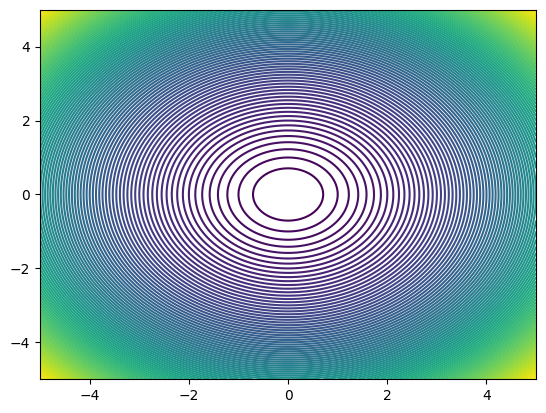

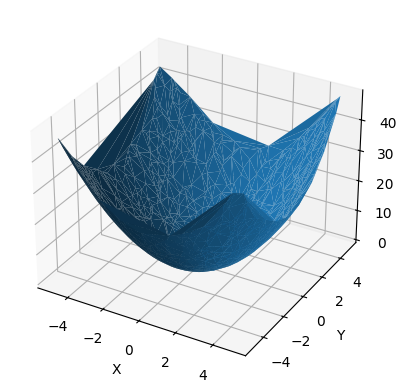

In [24]:
def plot2Dfunc(func,x1,x2,y1,y2):
    # input: 
    # func : function name
    # x1,x2 : x range
    # y1,y2 : y range
    #
    
    Npoints=1000 # number of points to sample

    x=np.linspace(x1,x2,Npoints)
    y=np.linspace(y1,y2,Npoints)
    
    z=np.zeros([Npoints,Npoints])

    for i in range(Npoints):
        # Z[y,x]
        z[i,:]=func(x,y[i])
        
    
    plt.contour(x,y,z,100)
    plt.show()

    x=np.random.uniform(x1,x2,Npoints)
    y=np.random.uniform(y1,y2,Npoints)
    
    z=func(x,y)
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') # Correct way to add 3D subplot
    
    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    ax.set_xlabel('X') # Use ax.set_xlabel instead of plt.xlabel for 3D plots
    ax.set_ylabel('Y') # Use ax.set_ylabel instead of plt.ylabel for 3D plots
    plt.show()


# Example function (replace with your Func_3)
def Func_3(x,y):
    return x**2 + y**2

plot2Dfunc(Func_3,-5,5,-5,5)

Now code a function that find the minimum of Func_3(x,y) using the following strategy.
Knowing that x1<xm<x2 and y1<ym<y2 : 
* start from a point (x0,y0) inside the interval and minimize along the x direction only (i.e. keeping y0=cst) between x1 and x2. Find a new point (x1,y0) closer to the minimum.
* now keep x1 constant and minimize along the y direction only (between y1 and y2). Find a new point (x1,y1) closer to the minimum.
* Redo the two previous steps up to a desired accuracy.
* Note : Re-use any of the functions that you have coded previously.
Find the minimum. How many steps did you do ?


In [25]:
def Minim_Parab_Func_2(x1, x2, x3, func, eps=1e-6, Nitermax=1000):
    f1, f2, f3 = func(x1), func(x2), func(x3)

    if not (f1 > f2 < f3):
        raise ValueError("Initial triplet must satisfy f(x2) < f(x1) and f(x2) < f(x3).")

    steps = 0
    while abs(x3 - x1) > eps and steps < Nitermax:
        num = (x2 - x1)**2 * (f2 - f3) - (x2 - x3)**2 * (f2 - f1)
        den = (x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)

        if den == 0:  # Avoid division by zero
            break

        x4 = x2 - 0.5 * num / den
        f4 = func(x4)

        # Midpoint to stabilize the interval
        x_mid = 0.5 * (x1 + x3)
        f_mid = func(x_mid)

        x_values = np.array([x1, x2, x3, x4, x_mid])
        f_values = np.array([f1, f2, f3, f4, f_mid])

        sorted_indices = np.argsort(x_values)
        x_values = x_values[sorted_indices]
        f_values = f_values[sorted_indices]

        min_index = np.argmin(f_values)
        if min_index == 0:
            x1, x2, x3 = x_values[0], x_values[1], x_values[2]
        elif min_index == len(x_values) - 1:
            x1, x2, x3 = x_values[-3], x_values[-2], x_values[-1]
        else:
            x1, x2, x3 = x_values[min_index - 1], x_values[min_index], x_values[min_index + 1]

        f1, f2, f3 = func(x1), func(x2), func(x3)
        steps += 1

    return func(x2), x2, steps

def minimize_Func_3(x1, x2, y1, y2, func, eps=1e-6, Nitermax=1000):
    x0 = (x1 + x2) / 2
    y0 = (y1 + y2) / 2

    steps = 0
    while steps < Nitermax:
        prev_x, prev_y = x0, y0

        # Minimize along x (keeping y constant)
        def func_x(x): return func(x, y0)
        _, x0, _ = Minim_Parab_Func_2(x1, x0, x2, func_x, eps=eps)

        # Minimize along y (keeping x constant)
        def func_y(y): return func(x0, y)
        _, y0, _ = Minim_Parab_Func_2(y1, y0, y2, func_y, eps=eps)

        steps += 1

        if abs(x0 - prev_x) < eps and abs(y0 - prev_y) < eps:
            break

    return func(x0, y0), (x0, y0), steps

# Define Func_3
def Func_3(x, y):
    return ((x + y) / (y**2 + 1) + 3 * x * y - 1)**2

# Minimize Func_3
x1, x2 = -5, 5
y1, y2 = -5, 5
eps = 1e-6

min_value, min_coords, steps = minimize_Func_3(x1, x2, y1, y2, Func_3, eps)

print(f"Minimum value: {min_value:.6f}")
print(f"Coordinates of minimum: (x, y) = ({min_coords[0]:.6f}, {min_coords[1]:.6f})")
print(f"Number of steps: {steps}")

Minimum value: 0.000000
Coordinates of minimum: (x, y) = (1.000000, 0.000000)
Number of steps: 2
